# Holding Current Slope Analysis

This project explores the utility of measuring the slow change in holing current before/after a drug exposure

### Set-Up the Environment

Only voltage-clamp ABFs with tags where drug was added will be analyzed

In [1]:
import pyabf
import slopeTools
import abfTools
import plotTools
import statsTools

abfFilePaths = [
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804007.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804024.abf", 
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804030.abf", 
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804043.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804048.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804060.abf", 
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20804066.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20805008.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20805029.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20805035.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20811011.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20811021.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20817012.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20831011.abf",
    R"X:/Data/C57/TGOT on PVT/2020-07-28 10nM TGOT on PVT/20831017.abf"
]

### Slope Analysis Example

* Slope of baseline and drug regions is determined using linear regression
* Baseline and drug regions are automatically placed relative to the first tag in the ABF

baseline slope = -0.105 pA / sweep
drug slope = -4.783 pA / sweep


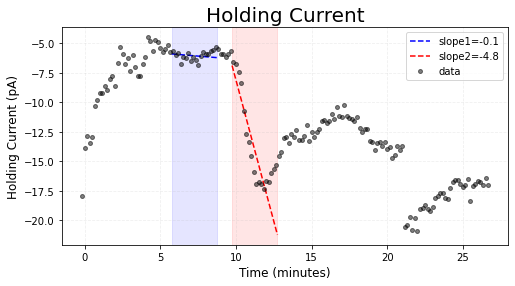

In [2]:
abfFilePath = abfFilePaths[4]
abf = pyabf.ABF(abfFilePath)
drugStartTime = abfTools.getFirstTagTime(abfFilePath)
slope1, slope2 = slopeTools.plotExperiment(abfFilePath, drugStartTime, measurementTime=3, drugMeasurementDelay=1)
print(f"baseline slope = {slope1} pA / sweep")
print(f"drug slope = {slope2} pA / sweep")

### Slope Analysis of Every Cell

* This step will run the analysis on every cell
* Baseline and drug slopes will be stored so we can analyze them as a population later
* Plots will be made for every cell so we can visually inspect the quality of the fit

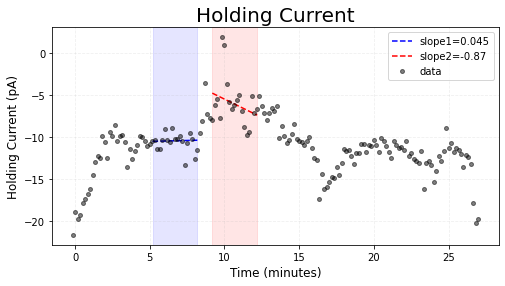

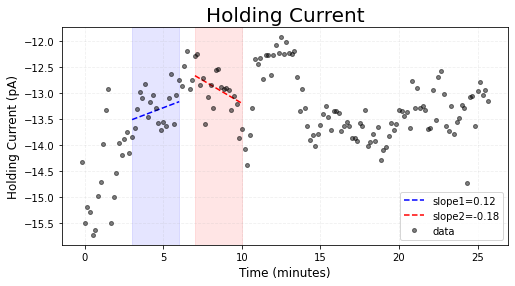

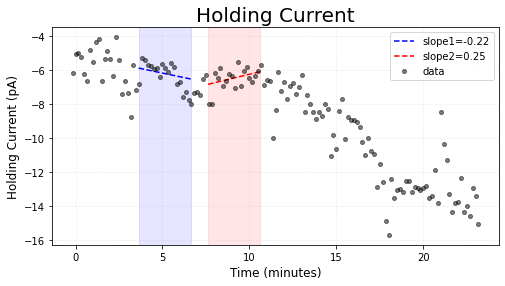

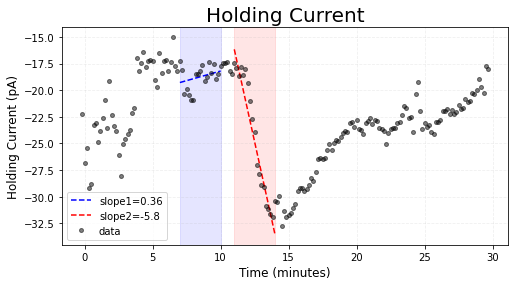

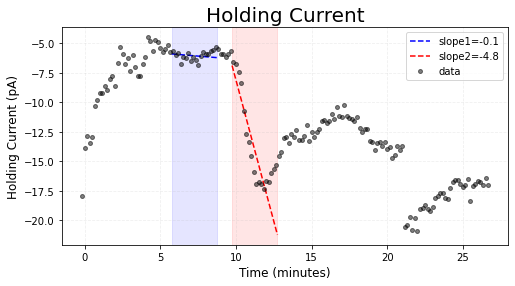

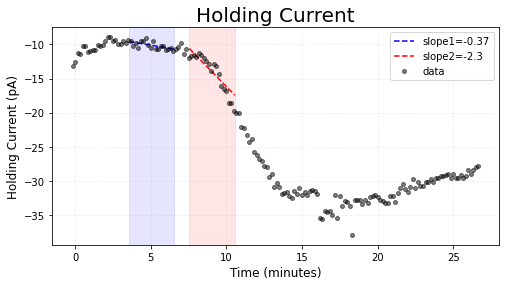

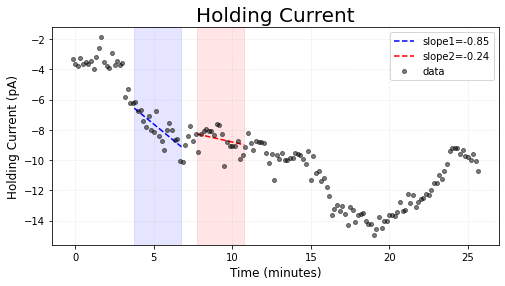

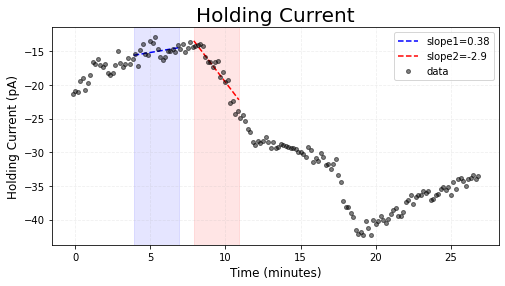

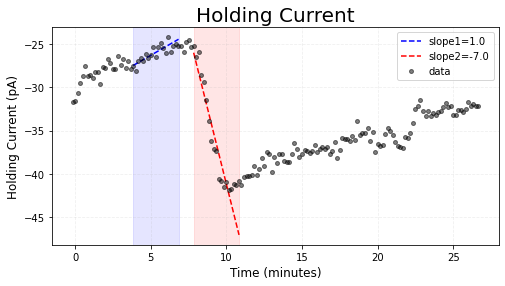

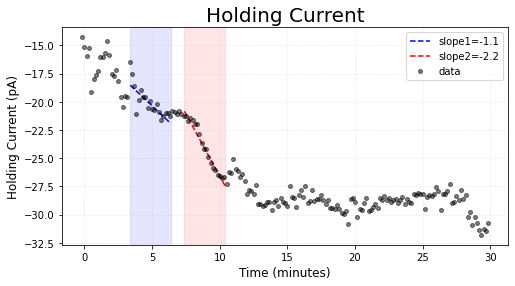

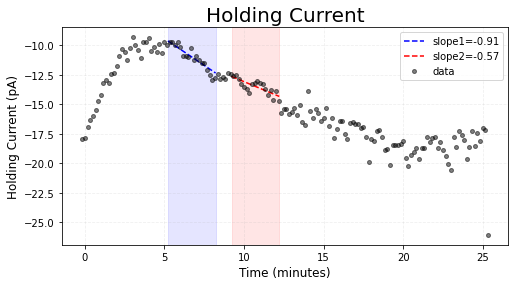

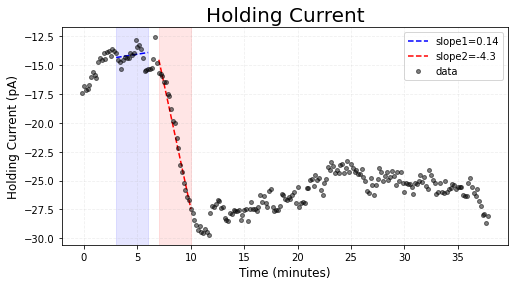

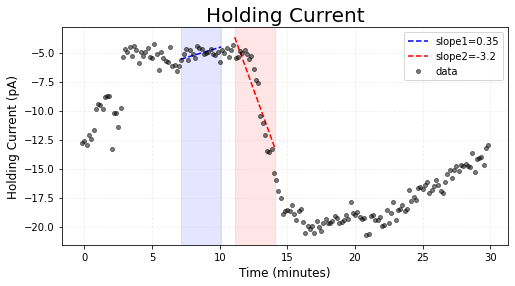

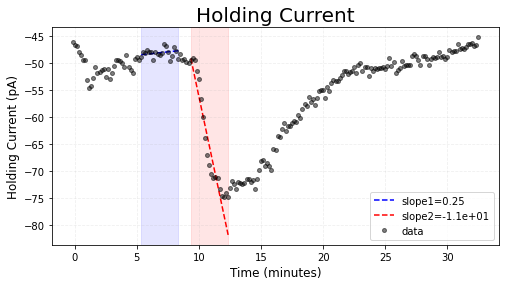

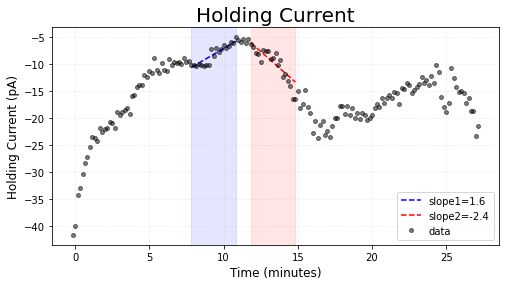

In [3]:
baselineSlopes=[]
drugSlopes=[]
abfIDs=[]

for abfFilePath in abfFilePaths:
    abf = pyabf.ABF(abfFilePath)
    abfIDs.append(abf.abfID)
    drugStartTime = abfTools.getFirstTagTime(abfFilePath)
    slope1, slope2 = slopeTools.plotExperiment(abfFilePath, drugStartTime, measurementTime=3, drugMeasurementDelay=1)
    baselineSlopes.append(slope1)
    drugSlopes.append(slope2)

### Population Analysis of Slope Changes for All Cells

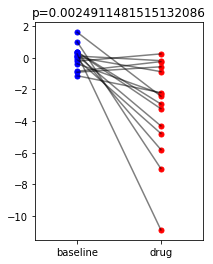

In [4]:
plotTools.plotPairs(baselineSlopes, drugSlopes)

In [5]:
# TODO: show this as a Pandas data frame and show mean ± stdErr of all columns

print(f"ABF ID\t\tSlope Change\tBaseline\tDrug")
    
for i in range(len(abfIDs)):
    
    abfID = abfIDs[i]
    slope1 = round(baselineSlopes[i], 3)
    slope2 = round(drugSlopes[i], 3)
    deltaSlope = round(slope2 - slope1, 3)
    
    print(f"{abfID}\t{deltaSlope}\t\t{slope1}\t\t{slope2}")

ABF ID		Slope Change	Baseline	Drug
20804007	-0.916		0.045		-0.871
20804024	-0.293		0.115		-0.178
20804030	0.465		-0.215		0.25
20804043	-6.164		0.361		-5.803
20804048	-4.678		-0.105		-4.783
20804060	-1.902		-0.373		-2.275
20804066	0.612		-0.85		-0.238
20805008	-3.295		0.376		-2.919
20805029	-8.014		1.009		-7.005
20805035	-1.069		-1.131		-2.2
20811011	0.343		-0.908		-0.565
20811021	-4.447		0.144		-4.303
20817012	-3.572		0.354		-3.218
20831011	-11.124		0.246		-10.878
20831017	-4.045		1.618		-2.427
